# load modules

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ks_2samp

from useful_functions_notebook_8to13 import *

# load and create data

In [3]:
dataset = torch.load('data/dataset.pt')
dataset = dataset.permute(1, 0, 2, 3)
dataset.shape

torch.Size([38348, 3, 29, 10])

In [14]:
zero = torch.zeros([30000, 1, 29, 10])
ones = torch.ones([6348, 1, 29, 10])
fives = torch.full([2000, 1, 29, 10], 0.5)
test = torch.cat([zero, ones, fives], dim = 0)
print(test.shape)
len(test[test == 0]), len(test[test == 0.5]), len(test[test == 1])

torch.Size([38348, 1, 29, 10])


(8700000, 580000, 1840920)

In [15]:
zero_data = dataset[:, 2].unsqueeze(1)
len(zero_data[zero_data == 0]), len(zero_data[zero_data == 0.5]), len(zero_data[zero_data == 1])

(8645546, 581572, 1893802)

In [16]:
test2 = zero_data.clone()
test2[:100] = 0.5
len(test2[test2 == 0]), len(test2[test2 == 0.5]), len(test2[test2 == 1])

(8624146, 608640, 1888134)

In [17]:
len(zero_data[zero_data == 0]), len(zero_data[zero_data == 0.5]), len(zero_data[zero_data == 1])

(8645546, 581572, 1893802)

# create useful functions

Real images:


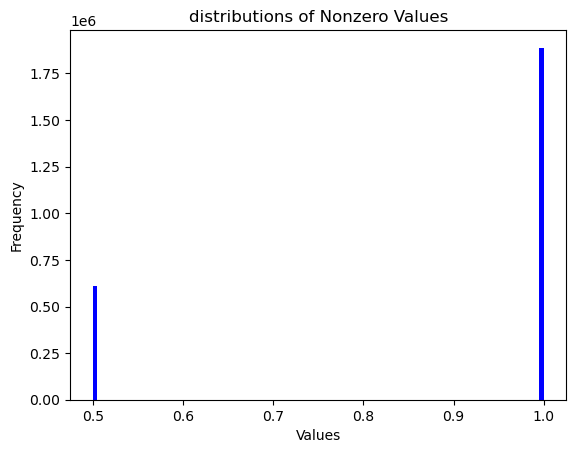

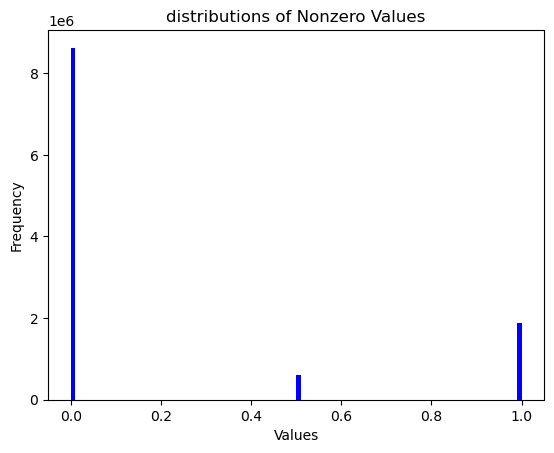

number of nonzero values = 2496774
Generated images:


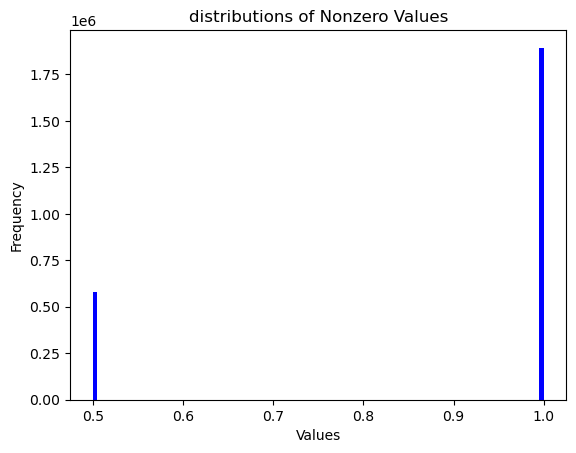

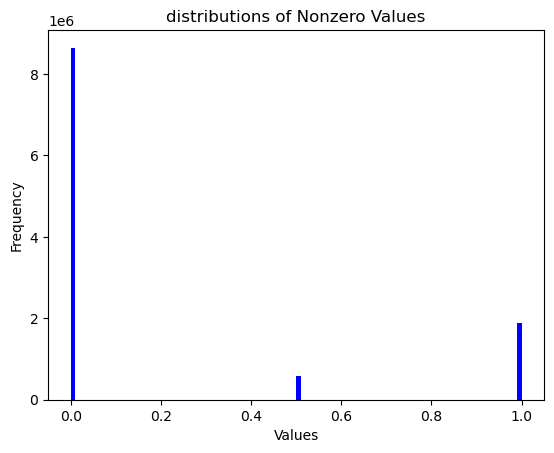

number of nonzero values = 2475374


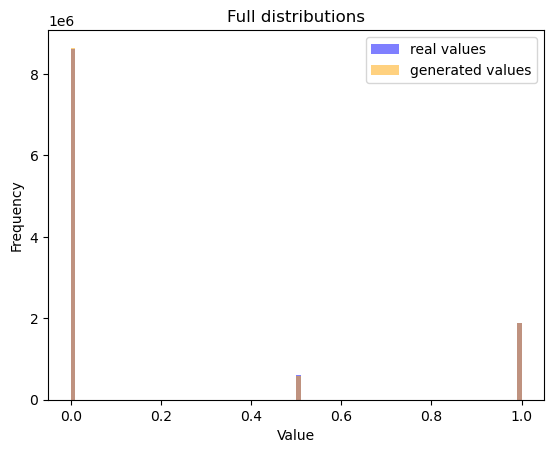

Full distribution:
KS Statistic: 0.0019243012268769233
P-value: 2.6073900021109463e-18

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0006:
The distributions are significantly different (reject H0), KS statistic 0.0019 > 0.0006


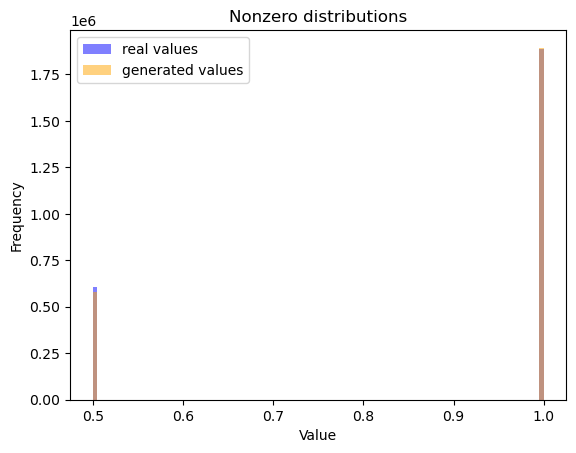

Nonzero distribution:
KS Statistic: 0.008827478184388449
P-value: 1.4655660282076868e-84

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0012:
The distributions are significantly different (reject H0), KS statistic 0.0088 > 0.0012


(0.0019243012268769233, 0.008827478184388449)

In [95]:
dist1 = test2
dist2 = zero_data

ks_test(dist1, dist2)

Real images:


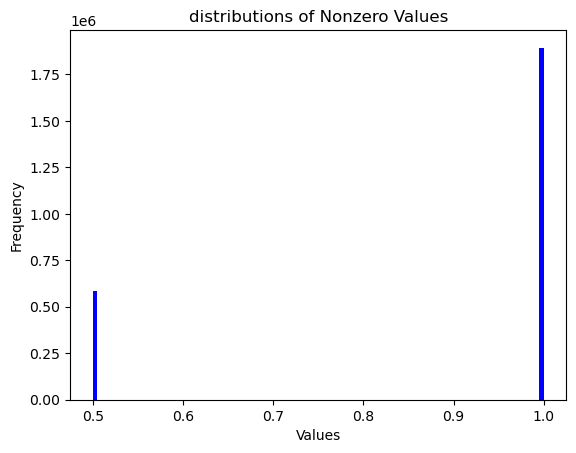

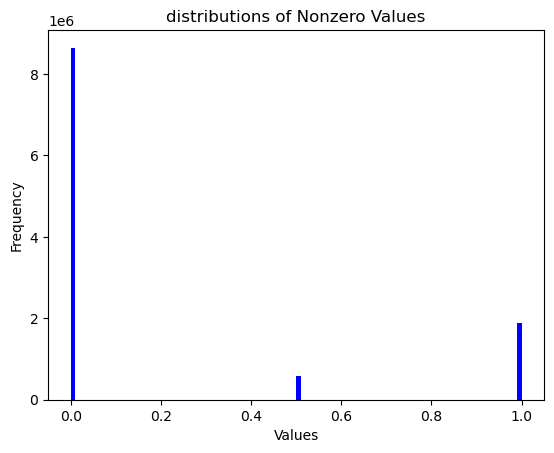

number of nonzero values = 2477626
Generated images:


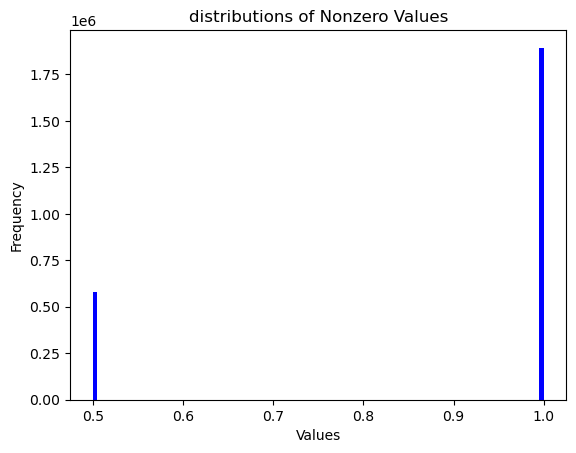

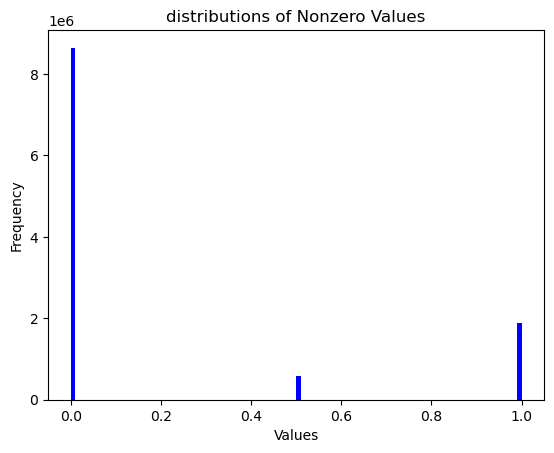

number of nonzero values = 2475374


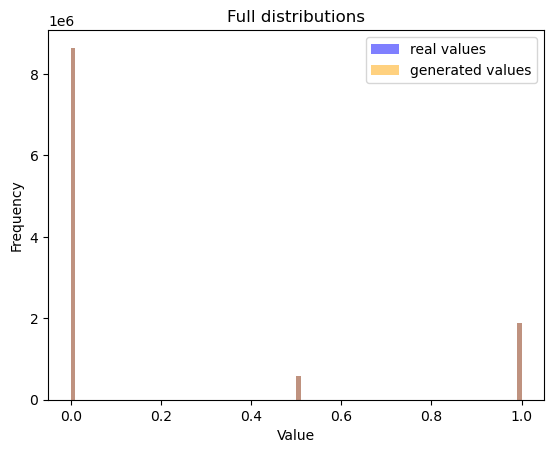

Full distribution:
KS Statistic: 0.00020250123191245528
P-value: 0.9765061875337276

According to regular significance level of 0.05:
The distributions are not significantly different (fail to reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0006:
The distributions are not significantly different (fail to reject H0), KS statistic 0.0002 < 0.0006


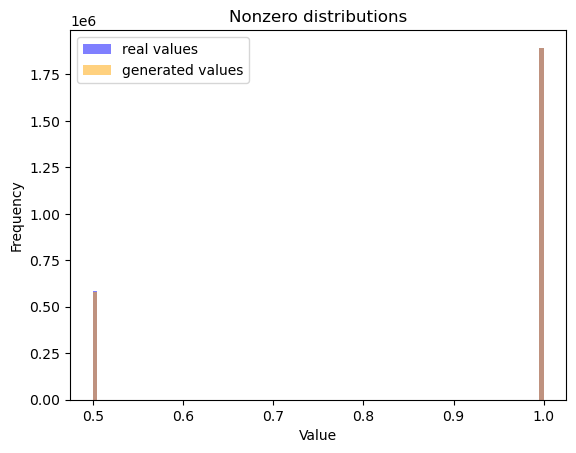

Nonzero distribution:
KS Statistic: 0.0008955783384174409
P-value: 0.2735326878738221

According to regular significance level of 0.05:
The distributions are not significantly different (fail to reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0012:
The distributions are not significantly different (fail to reject H0), KS statistic 0.0009 < 0.0012


(0.00020250123191245528, 0.0008955783384174409)

In [99]:
test3 = zero_data.clone()
test3[:10] = 0.5

dist1 = test3
dist2 = zero_data


ks_test(dist1, dist2)


# testing ks_2samp on some created data shows some possible issues: here i use only subhalo data, with values of 0.0, 0.5 and 1.0 only. changing 100 out of 38348 images to only containing 0.5, that is 0.26% of the images. meaning there are 0.5% differences in values in the two distributions gives a p-value which is basically 0

# but changing 10 images, that is 0.026% of the iamges, meaning only 0.049 gives a p-value of 0.9765. 

# This means the ks_2samp p-value is extremely sensitive to changes in the distribution

In [33]:
a = abs(len(test2[test2 == 0]) - len(zero_data[zero_data == 0]))
b = abs(len(test2[test2 == 0.5]) - len(zero_data[zero_data == 0.5]))
c = abs(len(test2[test2 == 1])  - len(zero_data[zero_data == 1]))

print("diff = ", a + b + c)

perc = 100 * (a + b + c) / len(test2.flatten())
perc

diff =  54136


0.486794258029012

In [37]:
a = abs(len(test3[test3 == 0]) - len(zero_data[zero_data == 0]))
b = abs(len(test3[test3 == 0.5]) - len(zero_data[zero_data == 0.5]))
c = abs(len(test3[test3 == 1])  - len(zero_data[zero_data == 1]))

print("diff = ", a + b + c)

perc = 100 * (a + b + c) / len(test3.flatten())
perc

diff =  5496


0.04942037169586689

# testing with other type of distribution, mass

Real images:


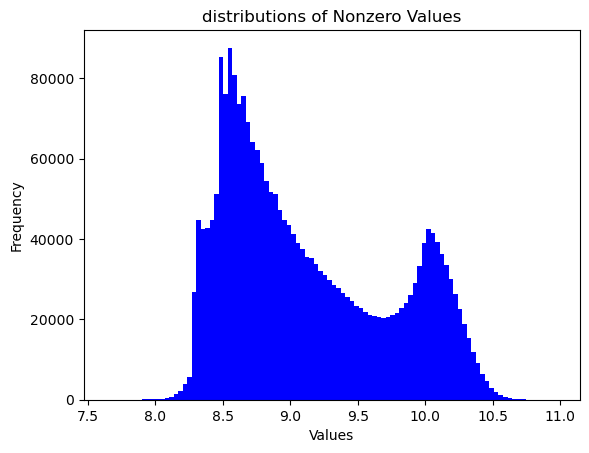

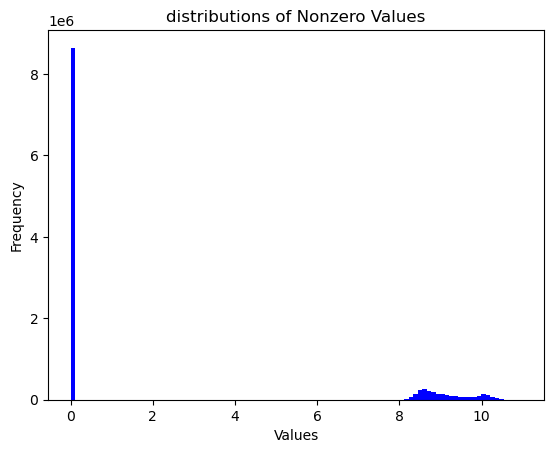

number of nonzero values = 2475374
Generated images:


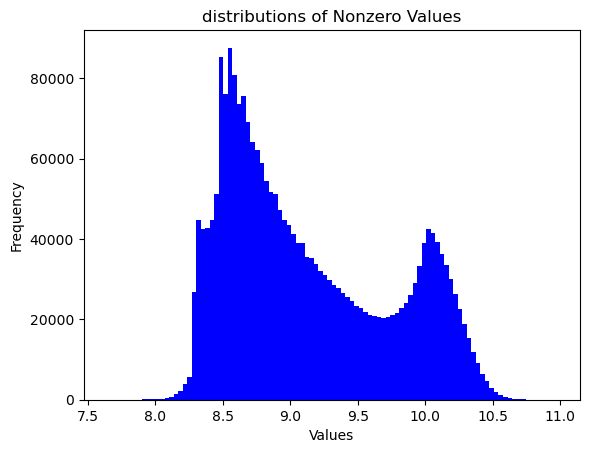

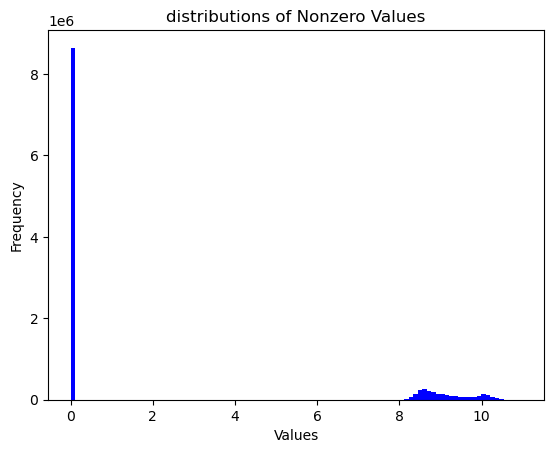

number of nonzero values = 2476458


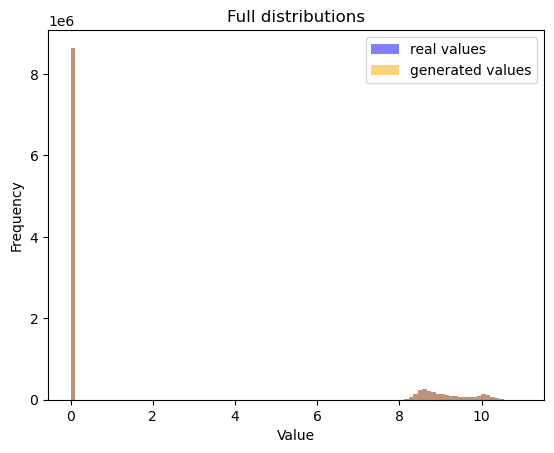

Full distribution:
KS Statistic: 0.00011563791484880959
P-value: 0.9999994229108752

According to regular significance level of 0.05:
The distributions are not significantly different (fail to reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0006:
The distributions are not significantly different (fail to reject H0), KS statistic 0.0001 < 0.0006


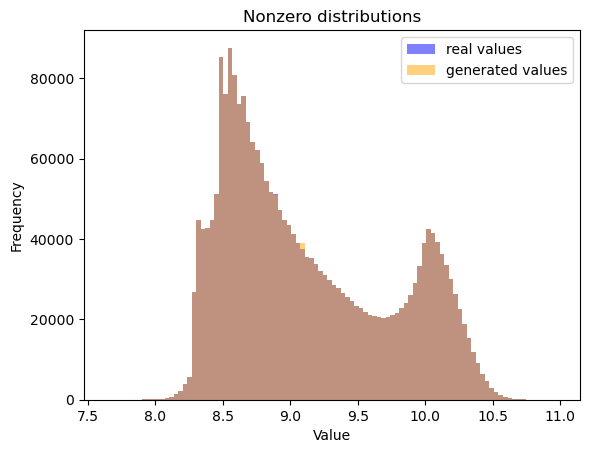

Nonzero distribution:
KS Statistic: 0.0003283531124201877
P-value: 0.9993312852067394

According to regular significance level of 0.05:
The distributions are not significantly different (fail to reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0012:
The distributions are not significantly different (fail to reject H0), KS statistic 0.0003 < 0.0012


(0.00011563791484880959, 0.0003283531124201877)

In [18]:
mass = dataset[:, 1].unsqueeze(1)
test_mass = mass.clone()
test_mass[:5] = 9.0929

dist1 = mass
dist2 = test_mass


ks_test(dist1, dist2)

Real images:


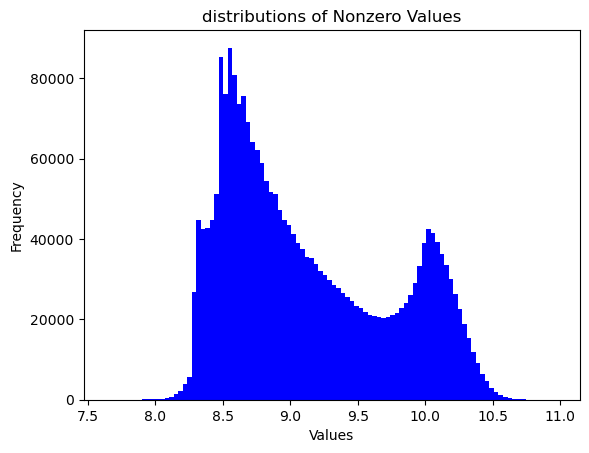

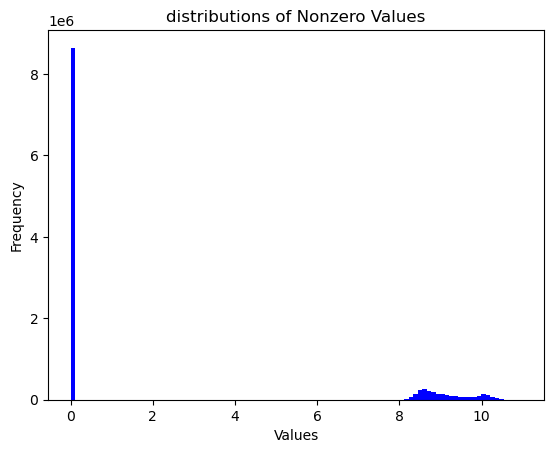

number of nonzero values = 2475374
Generated images:


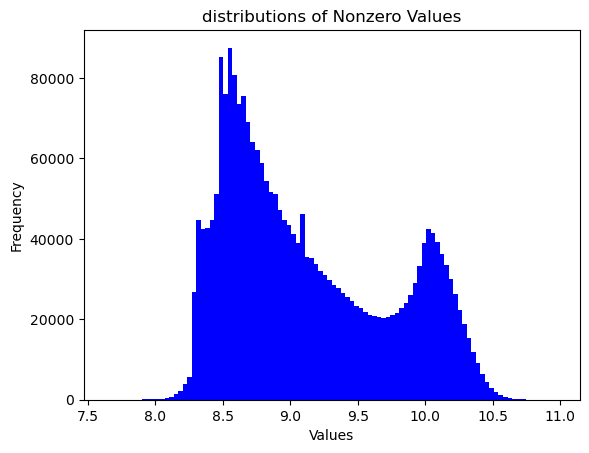

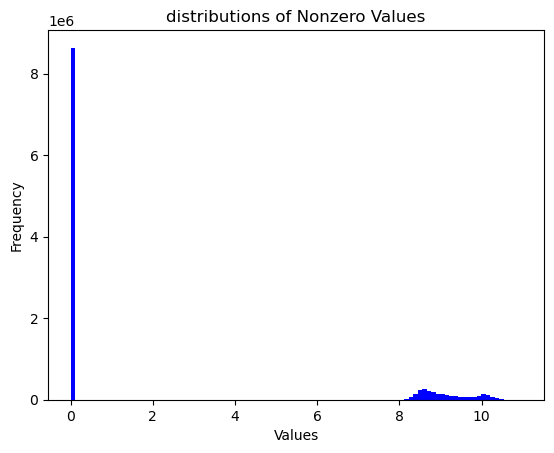

number of nonzero values = 2482080


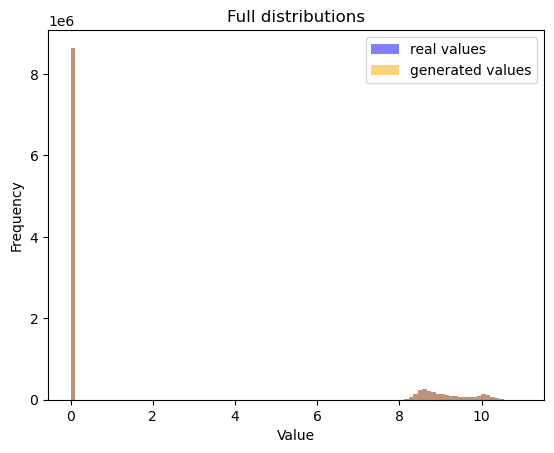

Full distribution:
KS Statistic: 0.000699312646795458
P-value: 0.008687470254920872

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0006:
The distributions are significantly different (reject H0), KS statistic 0.0007 > 0.0006


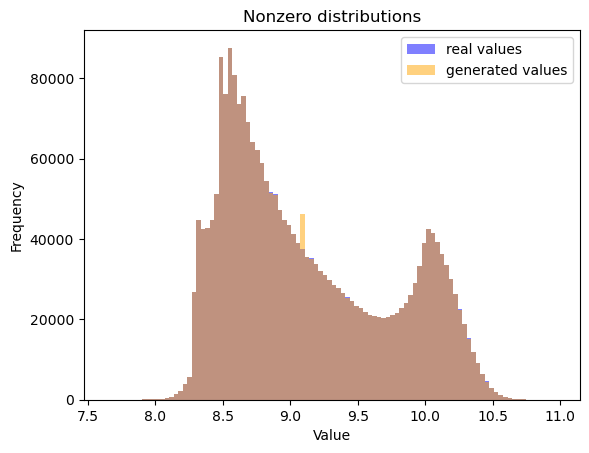

Nonzero distribution:
KS Statistic: 0.001954732538732573
P-value: 0.00015388554183270607

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0012:
The distributions are significantly different (reject H0), KS statistic 0.0020 > 0.0012


(0.000699312646795458, 0.001954732538732573)

In [21]:
mass = dataset[:, 1].unsqueeze(1)
test_mass = mass.clone()
test_mass[:30] = 9.0929

dist1 = mass
dist2 = test_mass


ks_test(dist1, dist2)

# changing only 30 out of 38348 images drops the p-value from 1.0 to 0.0096, meaning it is extremely sensitive

# according to wikipedia, for large samples, the p-value will be useless, and we should reject the null hypothesis if the statistic is greater than the following two values which should be fairly equal:

here a is the "statistically significance level"-ish, 


rejecting null hypothesis = distributions are significantly different

# Here, again, the larger the sample sizes, the more sensitive the minimal bound: For a given ratio of sample sizes (e.g. m = n), the minimal bound scales in the size of either of the samples according to its inverse square root.